In [ ]:
import Analysis
import cPickle as pickle
reload(Analysis)

A = Analysis.Analysis(tag='P7REP_CLEAN_V15_calore')

A.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A.BinPhotons(infile='binned_photons_'+A.tag+'.npy')


A.AddPointSourceTemplate(fixNorm=True)

A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',psc_model='PSC_' + A.tag + '.npy',
                        alpha_psc=5., f_psc=0.1)


A.AddIsotropicTemplate(fixNorm=False, fixSpectrum=False) # External chi^2 used to fix normalization within uncertainties

A.AddFermiBubbleTemplate(template_file='./bubble_templates_diskcut30.0.fits', 
                         spec_file='./reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False)

A.AddGalpropTemplate(basedir='/data/fermi_diffuse_models/', tag='SNR_z4kpc_R20kpc_Ts150K_EBV2mag', 
                     verbosity=1, multiplier=1., bremsfrac=1.25, E_subsample=3, fixSpectrum=False)


#A.AddFermiDiffuseModel(diffuse_path='/data/GCE_sys/gll_iem_v02_P6_V11_DIFFUSE.fit',
#                       infile='fermi_diffuse_'+A.tag+'.npy', multiplier=1.)


A.AddDMTemplate(profile='NFW', limits=[0,100.], decay=False, gamma=1.26, 
                r_s=20.0, axesratio=1, offset=(0, 0), spec_file=None,)



A.PrintTemplates()

In [ ]:
junk = A.RunLikelihood( print_level=1, use_basinhopping=False, start_fresh=False)



In [ ]:
import GammaLikelihood as l
reload(l)
l.RunLikelihood(A, print_level=1, use_basinhopping=False, start_fresh=False, niter_success=30)

In [ ]:
import Template
import Tools, healpy
reload(Tools)

plt.figure(figsize=(3.5,4))
def PlotComponent(name):
    E, flux, stat = A.GetSpectrum(name)
    if name is 'Data':
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat/1e3, label=name.replace('_','+'),
                     capthick=1, capsize=2, ls='-',c='k')
    else:
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat/1e3, label=name.replace('_','+'),capthick=1, capsize=2, ls=':' )
    
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    
PlotComponent('Data')    
PlotComponent('PSC')
# PlotComponent('Pi0_Brems')
# PlotComponent('ICS')

# PlotComponent('Bubbles')
# PlotComponent('Isotropic')
# PlotComponent('DM')

plt.legend(frameon=False, fontsize=8,ncol=2)
plt.ylim(1e-8,4e-4)
plt.xlim(.3,500)

#plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/likelihood_first_light.pdf', bbox_inches='tight')

#plt.yscale('linear')
#plt.ylim(0,1e-5)
print 


In [8]:
mask_idx = np.nonzero(A.mask)[0]
#import healpy
#healpy.mollview( A.templateList['Bubbles'].healpixCube[0])

import Tools
reload(Tools)
exp = Tools.GetExpMap(300,350,0,0,A.expCube)
binWidth=0.05 # in GeV

flux = np.array([np.average(A.templateList['Bubbles'].healpixCube[i_E][mask_idx])
        /Tools.GetExpMap(A.bin_edges[i_E],A.bin_edges[i_E+1],0,0,A.expCube)
                 /(A.bin_edges[i_E+1]-A.bin_edges[i_E]) for i_E in range(24)])

l, b = Tools.hpix2ang(mask_idx)

data = np.array([np.average(A.binned_data[i_E][mask_idx])
        /Tools.GetExpMap(A.bin_edges[i_E],A.bin_edges[i_E+1],0,0,A.expCube)
                 /(A.bin_edges[i_E+1]-A.bin_edges[i_E]) for i_E in range(24)])

pyfits.open('/data/fermi_data_1-8-14/gtbin_ALL_BOTH.fits').info()

data2 = np.array([np.average(A.binned_data[i_E][mask_idx]
        /Tools.GetExpMap(A.bin_edges[i_E],A.bin_edges[i_E+1],(l+180)%360,b,A.expCube,i_E))
                 /(A.bin_edges[i_E+1]-A.bin_edges[i_E]) for i_E in range(24)])




flux_err = np.array([np.sqrt(np.sum(A.templateList['Bubbles'].healpixCube[i_E][mask_idx]))
        /Tools.GetExpMap(A.bin_edges[i_E],A.bin_edges[i_E+1],0,0,A.expCube)
                 /(A.bin_edges[i_E+1]-A.bin_edges[i_E])/len(mask_idx) for i_E in range(24)])




E=np.array([0.5*(A.bin_edges[i_E]+A.bin_edges[i_E+1]) for i_E in range(24)])
E2=np.array([10**(np.mean(np.log10((A.bin_edges[i_E],A.bin_edges[i_E+1])))) for i_E in range(24)])

#plt.errorbar(E/1e3,E**2* flux/healpy.nside2pixarea(256)/1e3, yerr=E**2* flux_err/healpy.nside2pixarea(256)/1e3)
plt.errorbar(E2/1e3,E2**2* data/healpy.nside2pixarea(256)/1e3)
plt.errorbar(E2/1e3,E2**2* data2/healpy.nside2pixarea(256)/1e3)

plt.yscale('log')
plt.xscale('log')



 



print 10**-7*exp*len(mask_idx)*healpy.nside2pixarea(256)
plt.ylim(1e-8,1e-4)

l, b = Tools.hpix2ang(np.arange(12*256**2))   
exp = Tools.GetExpMap(300,350,l,b,A.expCube)
#healpy.mollview(exp)




Filename: /data/fermi_data_1-8-14/gtbin_ALL_BOTH.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      86   (721, 361, 24)   int32   
1    EBOUNDS     BinTableHDU     43   24R x 3C     [I, 1E, 1E]   
2    GTI         BinTableHDU     50   32441R x 2C   [D, D]   


TypeError: GetExpMap() takes exactly 5 arguments (6 given)

                NAME                    LIMITS      VALUE    FIXNORM    FIXSPEC   SRCCLASS
                  DM                [0, 100.0]     Vector      False      False        GEN
         --------------------------------------------------------------------------------------
                 [0]                [0, 100.0]  4.286e+01      False      False        GEN
                 [1]                [0, 100.0]  2.678e+01      False      False        GEN
                 [2]                [0, 100.0]  2.767e+01      False      False        GEN
                 [3]                [0, 100.0]  1.692e+01      False      False        GEN
                 [4]                [0, 100.0]  1.810e+01      False      False        GEN
                 [5]                [0, 100.0]  1.134e+01      False      False        GEN
                 [6]                [0, 100.0]  9.900e+00      False      False        GEN
                 [7]                [0, 100.0]  3.276e+00      False      False      

<matplotlib.colorbar.Colorbar instance at 0x7f9bcb36d200>

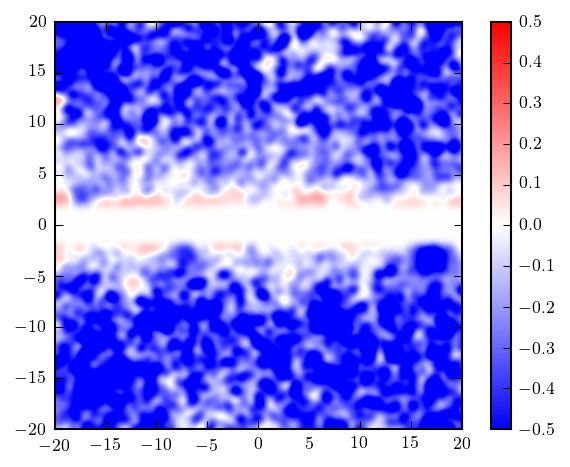

In [13]:
A.PrintTemplates()
import healpy
proj_map = healpy.cartview(A.residual[5], return_projected_map=True, latra=(-20,20), lonra=(-20,20),hold=True)
proj_data = healpy.cartview(A.binned_data[5], return_projected_map=True, latra=(-20,20), lonra=(-20,20),hold=True)

plt.clf()
from scipy import ndimage
blurred = ndimage.gaussian_filter(proj_map/proj_data, 8)
plt.imshow( blurred , origin='lower', vmin=-.5, vmax=.5, cmap='bwr', extent=[-20,20,-20,20])
plt.colorbar()





In [2]:
print np.max(A.templateList["PSC"].healpixCube)
print np.max(A.templateList["FermiDiffuse"].healpixCube)

KeyError: 'PSC'

In [2]:
A.AddFermiDiffuseModel(diffuse_path='/home/carlson/fermitools/refdata/fermi/galdiffuse/gll_iem_v05.fits',
                        infile='fermi_diffuse'+A.tag+'.npy')

1.5978966540475428e-05

In [73]:
import Analysis
reload(Analysis)
A = Analysis.Analysis()
A.GenPointSourceTemplate()




Generating Point Source Map: 99.95 %

array([[  7.95560352e-01,   7.75781842e-01,   7.79579867e-01, ...,
          5.14727322e-01,   4.85534727e-01,   4.78306359e-01],
       [  4.26126769e-01,   4.12207239e-01,   4.15329685e-01, ...,
          3.20592190e-01,   2.97302883e-01,   2.92202615e-01],
       [  2.25199519e-01,   2.15742102e-01,   2.18005357e-01, ...,
          1.99801359e-01,   1.82344366e-01,   1.78828083e-01],
       ..., 
       [  1.76011791e-04,   1.75564360e-04,   1.77504466e-04, ...,
          1.90041242e-04,   1.79385588e-04,   1.72753436e-04],
       [  8.96681945e-05,   8.99332136e-05,   9.12168217e-05, ...,
          1.04701156e-04,   1.01519405e-04,   9.71909116e-05],
       [  7.61362035e-05,   7.66839088e-05,   7.80398369e-05, ...,
          6.97910260e-05,   7.03362462e-05,   6.77280492e-05]])

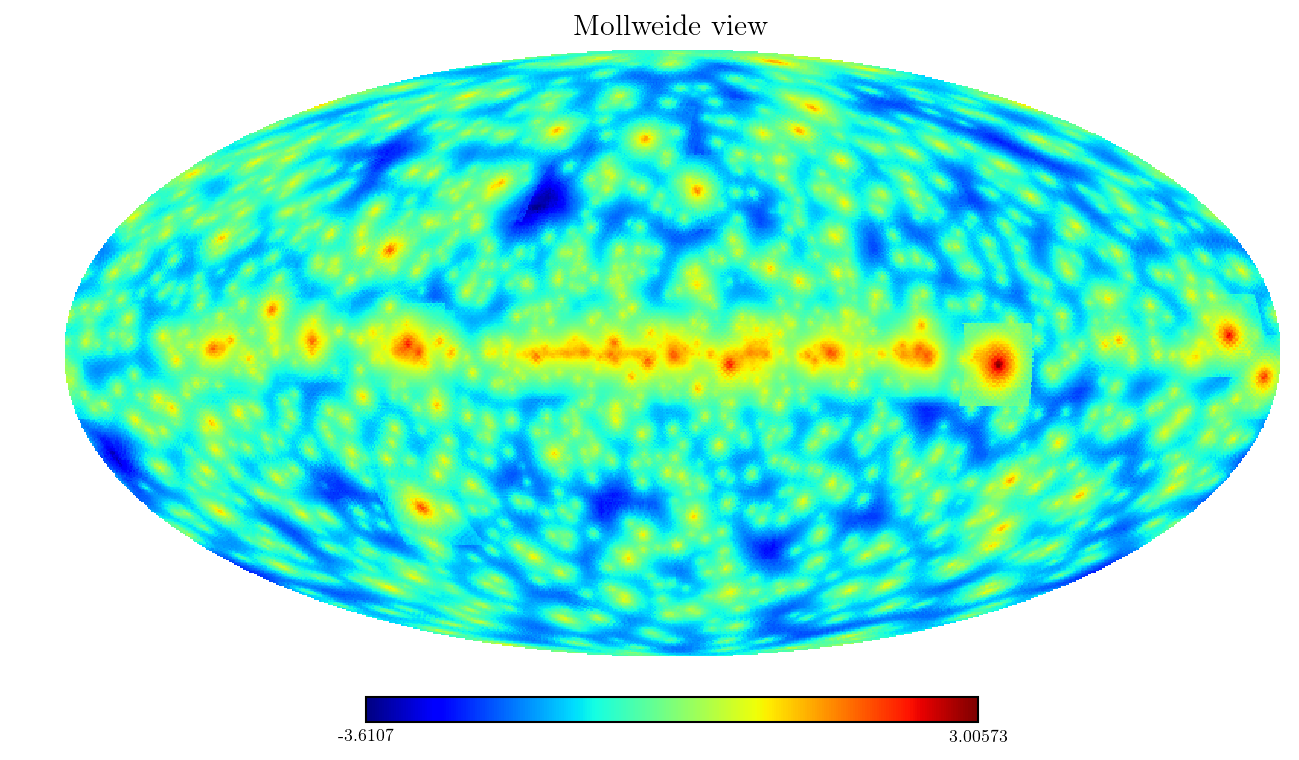

In [74]:
import healpy
map_ret = healpy.mollview(( np.log10(np.load('./PSC_P7REP_CLEAN_V15_test.npy') [0])),return_projected_map=True)

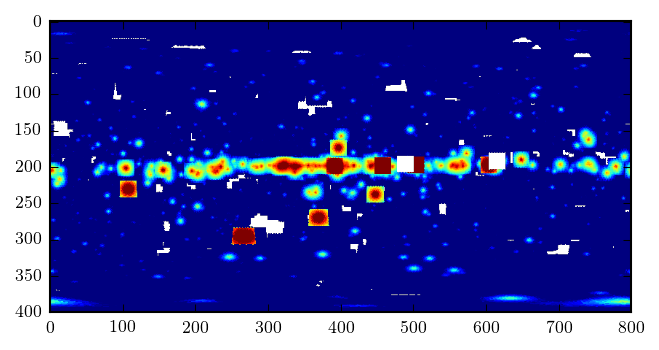

In [15]:
plt.imshow(map_ret, vmin=0,vmax=3)

/home/carlson/ipython/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from IPython.kernel.zmq import kernelapp as app


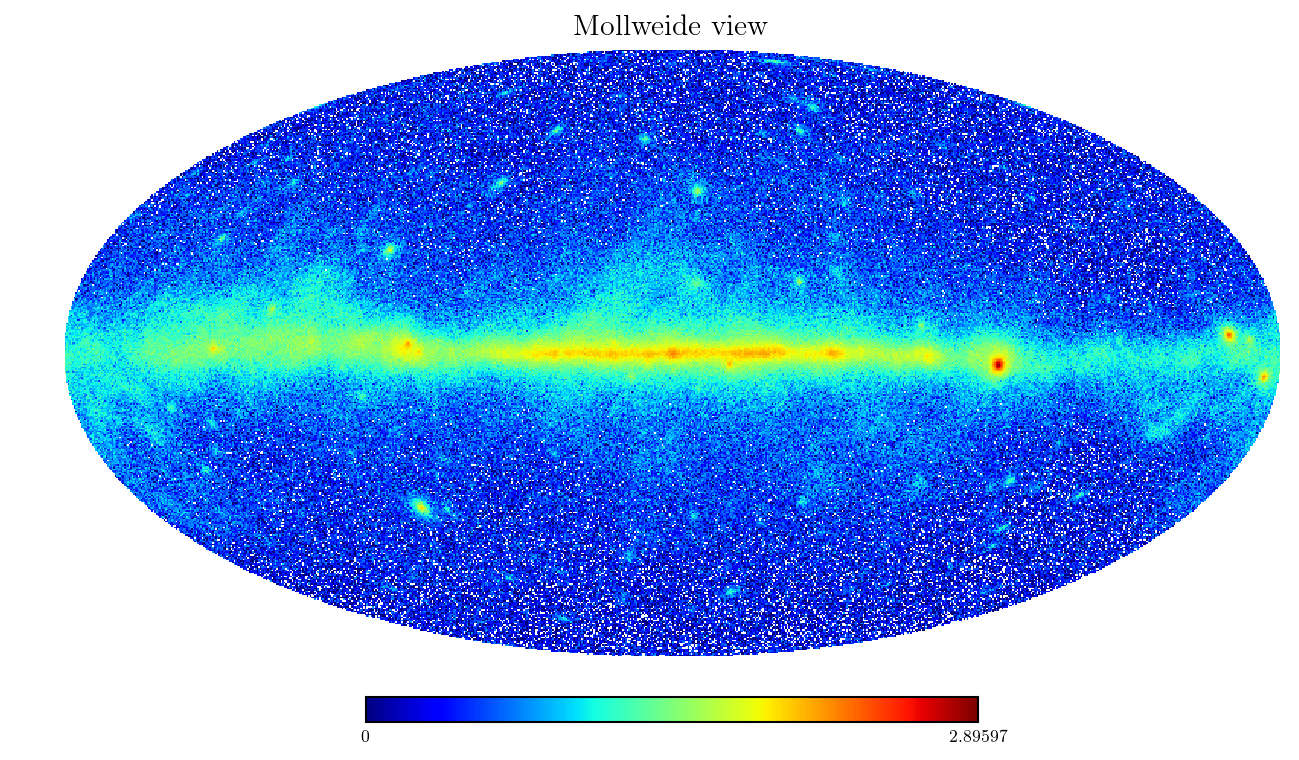

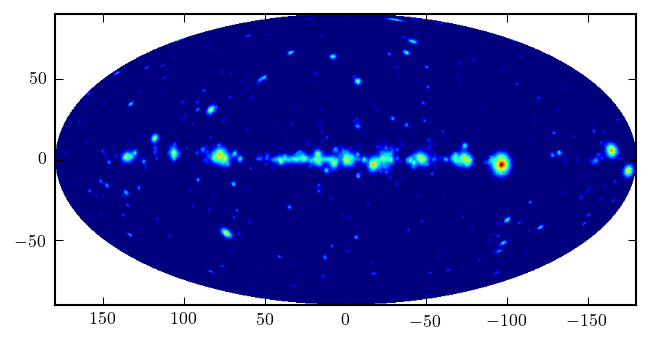

In [77]:
A.BinPhotons(infile='binned_photons_'+A.tag+'.npy')
healpy.mollview(np.log10(A.binned_data[0]))
#m = healpy.mollview(np.log10( np.load('./PSC_P7REP_CLEAN_V15_test.npy') [0]), return_projected_map=True)
#plt.gcf()
plt.show()
plt.imshow(m, origin='lower', extent=[180,-180,-90,90],vmin=0,vmax=2.9)
#plt.colorbar()
#plt.xlim(-180,180)
plt.show()

In [40]:
np.min(np.load('./PSC_P7REP_CLEAN_V15_test.npy')[0])

-inf

8.3255001e+10